### Introduction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5 CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Therefore this notebook will attempt to do this with relative high amount of accuracy & recall.

#### Attribute Information

 - **Age:** age of the patient [years]
 - **Sex:** sex of the patient [M: Male, F: Female]
 - **ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
 - **RestingBP:** resting blood pressure [mm Hg]
 - **Cholesterol:** serum cholesterol [mm/dl]
 - **FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
 - **RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
 - **MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]
 - **ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]
 - **Oldpeak:** oldpeak = ST [Numeric value measured in depression]
 - **ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
 - **HeartDisease:** output class [1: heart disease, 0: Normal]

#### Necessary Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

#### Read in and inspect the data

In [2]:
heart_df = pd.read_csv('./data/heart.csv')
heart_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### EDA

Explore the dataset and perform the wrangling as required....

In [4]:
## Checking for Null values

heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Looking at the above, there are no missing values for any of the attributes in the dataset.

In [5]:
## Checking for all the unique values against the attributes

for i, col in enumerate(heart_df.columns):
    print(heart_df.columns[i], '::\n', heart_df[str(col)].unique(), '\n\n')

Age ::
 [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71] 


Sex ::
 ['M' 'F'] 


ChestPainType ::
 ['ATA' 'NAP' 'ASY' 'TA'] 


RestingBP ::
 [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164] 


Cholesterol ::
 [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231

1    508
0    410
Name: HeartDisease, dtype: int64

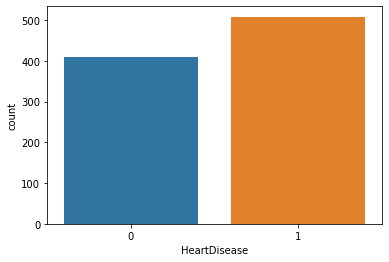

In [6]:
## Checking for the class imbalance of the Target Variable

sb.countplot(heart_df.HeartDisease)
heart_df.HeartDisease.value_counts()

Looking at the above counts there's not much of a class imbalance, so we need not apply any sampling methods.

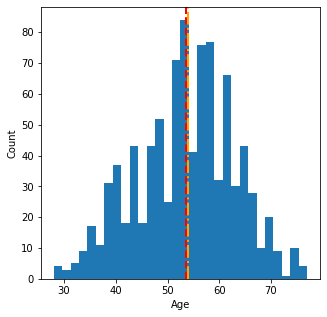

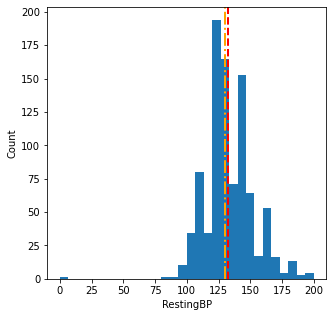

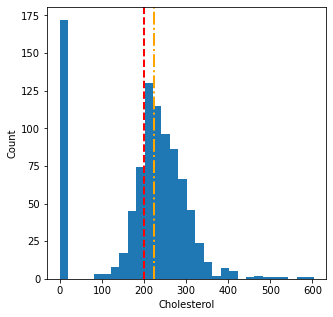

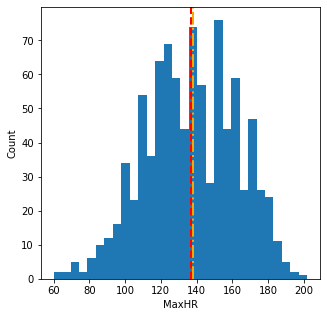

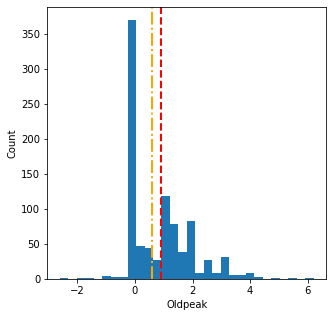

In [7]:
## Checking for the distributions of the quantitative attributes

for col in heart_df.select_dtypes(exclude = 'object').columns.drop(['FastingBS', 'HeartDisease']):  ## Removing FastingBS & HeartDisease attributes as they are ordinal variables with values of 1 & 0
    plt.figure(figsize = [5, 5])
    plt.hist(heart_df[str(col)], bins = 30)
    plt.axvline(x = heart_df[str(col)].mean(), color = 'red', ls = '--', lw = 2)
    plt.axvline(x = heart_df[str(col)].median(), color = 'orange', ls = '-.', lw = 2)
    plt.xlabel(str(col))
    plt.ylabel('Count')
    plt.show()

There's not much skewness among the distributions as seen above so, we are not going for any numerical transformations.

In [8]:
heart_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


Looking at the above, we can see that the `Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina` and `ST_Slope` contain ordinal values in **Char** and **Str** format, so we would do best to encode them to numerical ordinal values..

In [9]:
## Label encode the Str attributes

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

heart_df['Sex'] = le.fit_transform(heart_df['Sex'])
heart_df['ChestPainType'] = le.fit_transform(heart_df['ChestPainType'])
heart_df['RestingECG'] = le.fit_transform(heart_df['RestingECG'])
heart_df['ExerciseAngina'] =  le.fit_transform(heart_df['ExerciseAngina'])
heart_df['ST_Slope'] = le.fit_transform(heart_df['ST_Slope'])

heart_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


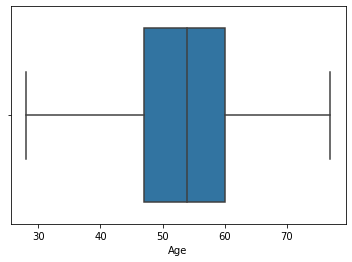

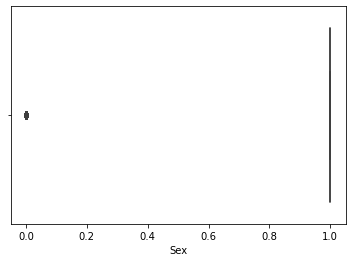

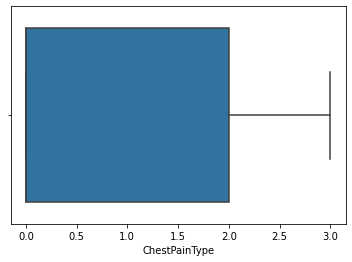

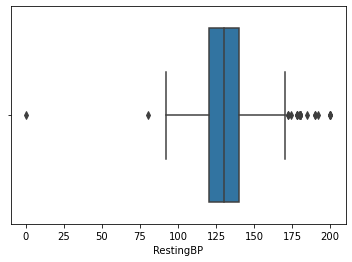

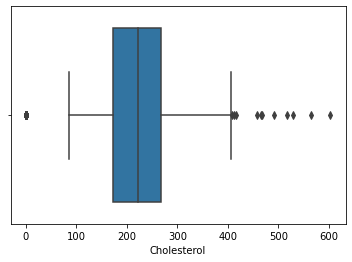

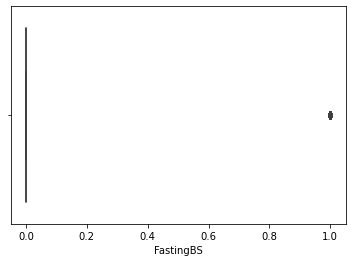

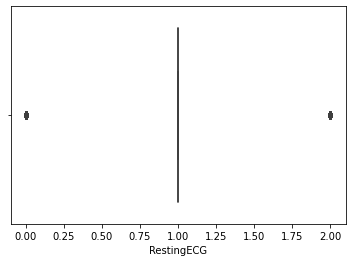

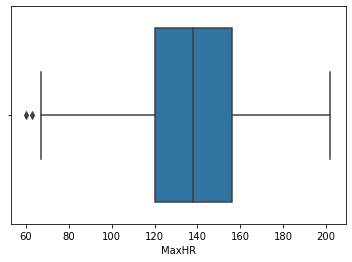

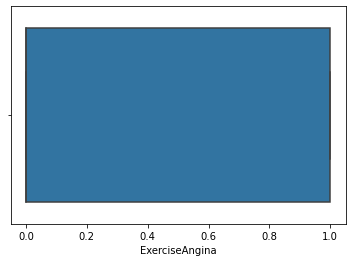

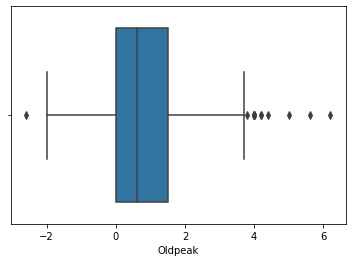

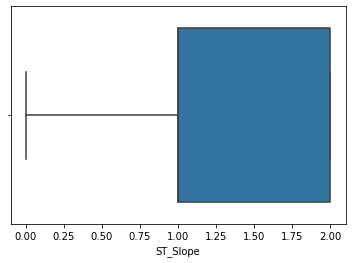

In [10]:
## Checking for outliers

for col in heart_df.columns[:-1]:
    sb.boxplot(heart_df[col]);
    plt.show()

Looking at the above plots, it is clear that the attributes `RestingBP`, `Cholesterol`, `MaxHR` and `Oldpeak` contain outliers, so we would do best to cap them (we are not removing them since we are taking into account all the attributes may be a good contributor to the target). 

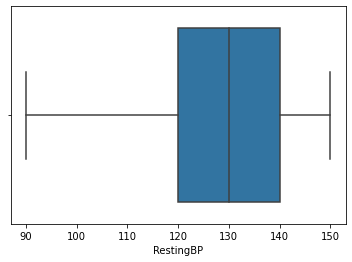

In [11]:
## Capping `RestingBP`

lower = heart_df['RestingBP'].quantile(0.25) - 1.5 * (heart_df['RestingBP'].quantile(0.75) - 
                                                      heart_df['RestingBP'].quantile(0.25))
upper = heart_df['RestingBP'].quantile(0.25) + 1.5 * (heart_df['RestingBP'].quantile(0.75) - 
                                                      heart_df['RestingBP'].quantile(0.25))

heart_df['RestingBP'] = np.where(heart_df['RestingBP'] > upper, upper, 
                                 np.where(heart_df['RestingBP'] < lower, lower, heart_df['RestingBP']))

sb.boxplot(heart_df['RestingBP']);
plt.show()

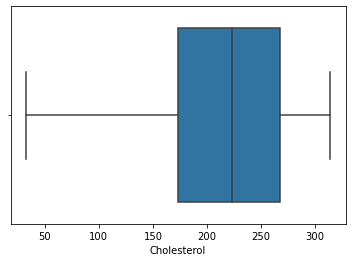

In [12]:
## Capping `Cholesterol`

lower = heart_df['Cholesterol'].quantile(0.25) - 1.5 * (heart_df['Cholesterol'].quantile(0.75) - 
                                                        heart_df['Cholesterol'].quantile(0.25))
upper = heart_df['Cholesterol'].quantile(0.25) + 1.5 * (heart_df['Cholesterol'].quantile(0.75) - 
                                                        heart_df['Cholesterol'].quantile(0.25))

heart_df['Cholesterol'] = np.where(heart_df['Cholesterol'] > upper, upper, 
                                   np.where(heart_df['Cholesterol'] < lower, lower, heart_df['Cholesterol']))

sb.boxplot(heart_df['Cholesterol']);
plt.show()

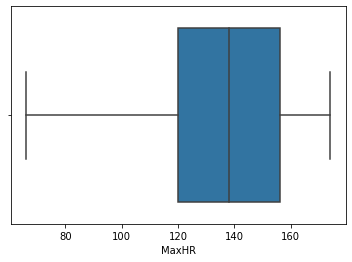

In [13]:
## Capping `MaxHR`

lower = heart_df['MaxHR'].quantile(0.25) - 1.5 * (heart_df['MaxHR'].quantile(0.75) - 
                                                  heart_df['MaxHR'].quantile(0.25))
upper = heart_df['MaxHR'].quantile(0.25) + 1.5 * (heart_df['MaxHR'].quantile(0.75) - 
                                                  heart_df['MaxHR'].quantile(0.25))

heart_df['MaxHR'] = np.where(heart_df['MaxHR'] > upper, upper, 
                             np.where(heart_df['MaxHR'] < lower, lower, heart_df['MaxHR']))

sb.boxplot(heart_df['MaxHR']);
plt.show()

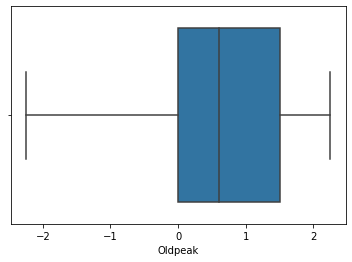

In [14]:
## Capping `Oldpeak`

lower = heart_df['Oldpeak'].quantile(0.25) - 1.5 * (heart_df['Oldpeak'].quantile(0.75) - 
                                                    heart_df['Oldpeak'].quantile(0.25))
upper = heart_df['Oldpeak'].quantile(0.25) + 1.5 * (heart_df['Oldpeak'].quantile(0.75) - 
                                                    heart_df['Oldpeak'].quantile(0.25))

heart_df['Oldpeak'] = np.where(heart_df['Oldpeak'] > upper, upper, 
                               np.where(heart_df['Oldpeak'] < lower, lower, heart_df['Oldpeak']))

sb.boxplot(heart_df['Oldpeak']);
plt.show()

In [15]:
heart_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.000,0,1,172.0,0,0.0,2,0
1,49,0,2,150.0,180.000,0,1,156.0,0,1.0,1,1
2,37,1,1,130.0,283.000,0,2,98.0,0,0.0,2,0
3,48,0,0,138.0,214.000,0,1,108.0,1,1.5,1,1
4,54,1,2,150.0,195.000,0,1,122.0,0,0.0,2,0
5,39,1,2,120.0,313.875,0,1,170.0,0,0.0,2,0
6,45,0,1,130.0,237.000,0,1,170.0,0,0.0,2,0
7,54,1,1,110.0,208.000,0,1,142.0,0,0.0,2,0
8,37,1,0,140.0,207.000,0,1,130.0,1,1.5,1,1
9,48,0,1,120.0,284.000,0,1,120.0,0,0.0,2,0


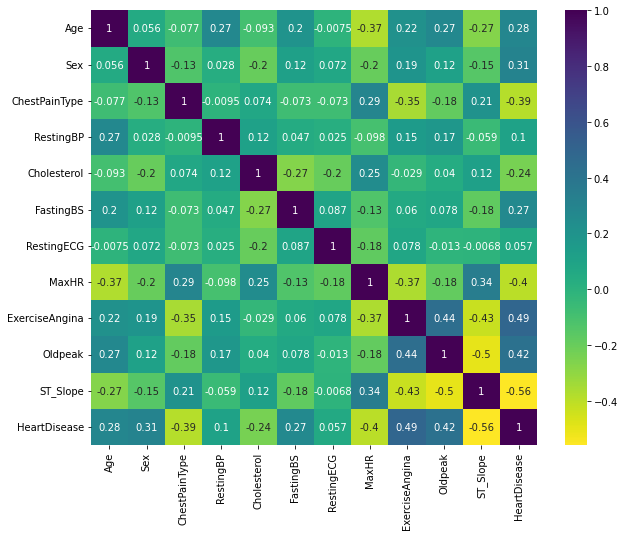

In [16]:
## Plotting the Heatmap to showcase the correlations among the attributes and that of the Target variable

plt.figure(figsize = [10, 8])
sb.heatmap(heart_df.corr(), cmap = 'viridis_r', annot = True);
plt.show()

Looking at the above map, it seems there are some less significant attributes related to the Target variable but we will not drop the same because they have some quantifiable relationships with other significant attributes.

We will go ahead with modelling using all of them!

In [17]:
## Splitting the data into Train & Test

from sklearn.model_selection import train_test_split

x_train, x_test, Y_train, Y_test = train_test_split(heart_df.iloc[:, :-1].values, heart_df.iloc[:, -1].values, 
                                                    test_size = 0.3, random_state = 123)

x_train.shape, x_test.shape, Y_train.shape, Y_test.shape

((642, 11), (276, 11), (642,), (276,))

In [18]:
## Normalizing the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

sc_x_train = scaler.fit_transform(x_train)
sc_x_test = scaler.transform(x_test)

sc_x_train, x_train, sc_x_test

(array([[ 0.29076674,  0.51843486, -0.81406539, ...,  1.22793017,
          1.34191799, -0.64106918],
        [-0.55774347, -1.92888264,  0.24819067, ..., -0.81437856,
         -0.91585924,  1.03879373],
        [ 0.18470296,  0.51843486, -0.81406539, ...,  1.22793017,
          1.34191799, -0.64106918],
        ...,
        [-1.08806235,  0.51843486, -0.81406539, ...,  1.22793017,
          1.34191799, -0.64106918],
        [ 1.13927695, -1.92888264, -0.81406539, ...,  1.22793017,
          0.21302937, -0.64106918],
        [ 0.71502185,  0.51843486, -0.81406539, ..., -0.81437856,
         -0.57719266,  1.03879373]]),
 array([[56. ,  1. ,  0. , ...,  1. ,  2. ,  1. ],
        [48. ,  0. ,  1. , ...,  0. ,  0. ,  2. ],
        [55. ,  1. ,  0. , ...,  1. ,  2. ,  1. ],
        ...,
        [43. ,  1. ,  0. , ...,  1. ,  2. ,  1. ],
        [64. ,  0. ,  0. , ...,  1. ,  1. ,  1. ],
        [60. ,  1. ,  0. , ...,  0. ,  0.3,  2. ]]),
 array([[-1.83050879,  0.51843486, -0.81406539, ...,

### Building the Models

 - Use GridSearch to figure out the best set of hyperparameters to use

##### Logistic Regression

GridSearch has been performed for this and we have arrived at the following hyperparams to produce the best score (Accuracy):

- Best metrics: `0.864438` using `{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}`

Since it takes much time, it has been omitted from the runtime.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, f1_score, classification_report

lr_model = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 0.1, random_state = 123)

Y_pred = lr_model.fit(sc_x_train, Y_train).predict(sc_x_test)

print('The Recall score for the LogisticRegression model: ', recall_score(Y_test, Y_pred))
print('The corresponding F1-score: ', f1_score(Y_test, Y_pred))
print('\n\n')
print('The corresponding Classification Report: \n', classification_report(Y_test, Y_pred))

The Recall score for the LogisticRegression model:  0.8782051282051282
The corresponding F1-score:  0.853582554517134



The corresponding Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       120
           1       0.83      0.88      0.85       156

    accuracy                           0.83       276
   macro avg       0.83      0.82      0.83       276
weighted avg       0.83      0.83      0.83       276



##### Decision Trees

GridSearch has been performed for this and we have arrived at the following hyperparams to produce the best metrics (Accuracy):

- Best metrics: `0.842684` using `{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}`

Since it takes much time, it has been omitted from the runtime.

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 10, 
                                  min_samples_split = 2, random_state = 123)

Y_pred = dt_model.fit(sc_x_train, Y_train).predict(sc_x_test)

print('The Recall score for the DecisionTree model: ', recall_score(Y_test, Y_pred))
print('The corresponding F1-score: ', f1_score(Y_test, Y_pred))
print('\n\n')
print('The corresponding Classification Report: \n', classification_report(Y_test, Y_pred))

The Recall score for the DecisionTree model:  0.8333333333333334
The corresponding F1-score:  0.8496732026143791



The corresponding Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       120
           1       0.87      0.83      0.85       156

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



##### Random Forest

GridSearch has been performed for this and we have arrived at the following hyperparams to produce the best metrics (Accuracy):

- Best metrics: `0.88934` using `{'criterion': 'entropy', 'max_depth': 'None', 'min_samples_leaf': '3', 'min_samples_split': '10', 'n_estimators': '15', 'n_jobs': '1'}`

Since it takes much time, it has been omitted from the runtime.

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(criterion = 'entropy', max_depth = None, min_samples_leaf = 3, 
                                  min_samples_split = 10, n_estimators = 15, n_jobs = 1, random_state = 123)

Y_pred = rf_model.fit(sc_x_train, Y_train).predict(sc_x_test)

print('The Recall score for the RandomForest model: ', recall_score(Y_test, Y_pred))
print('The corresponding F1-score: ', f1_score(Y_test, Y_pred))
print('\n\n')
print('The corresponding Classification Report: \n', classification_report(Y_test, Y_pred))

The Recall score for the RandomForest model:  0.9294871794871795
The corresponding F1-score:  0.8868501529051989



The corresponding Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.78      0.84       120
           1       0.85      0.93      0.89       156

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.87      0.87      0.86       276



##### AdaBoost

GridSearch has been performed for this and we have arrived at the following hyperparams to produce the best metrics (Accuracy):

- Best metrics: `0.867551` using `{'learning_rate': 0.1, 'n_estimators': 50}`

Since it takes much time, it has been omitted from the runtime.

In [22]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 50)

Y_pred = ab_model.fit(sc_x_train, Y_train).predict(sc_x_test)

print('The Recall score for the Adaboost model: ', recall_score(Y_test, Y_pred))
print('The corresponding F1-score: ', f1_score(Y_test, Y_pred))
print('\n\n')
print('The corresponding Classification Report: \n', classification_report(Y_test, Y_pred))

The Recall score for the Adaboost model:  0.9038461538461539
The corresponding F1-score:  0.8785046728971962



The corresponding Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       120
           1       0.85      0.90      0.88       156

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276



##### XGBoost

GridSearch has been performed for this and we have arrived at the following hyperparams to produce the best metrics (Accuracy):

- Best metrics: `0.873777` using `{'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'n_jobs': 1}`

Since it takes much time, it has been omitted from the runtime.

In [23]:
import xgboost
from xgboost.sklearn import XGBClassifier

xg_model = XGBClassifier(booster = 'gbtree', learning_rate = 0.01, max_depth = 3, n_estimators = 500, n_jobs = 1, 
                         verbosity = 0, random_state = 123)

Y_pred = xg_model.fit(sc_x_train, Y_train).predict(sc_x_test)

print('The Recall score for the XGBoost model: ', recall_score(Y_test, Y_pred))
print('The corresponding F1-score: ', f1_score(Y_test, Y_pred))
print('\n\n')
print('The corresponding Classification Report: \n', classification_report(Y_test, Y_pred))

The Recall score for the XGBoost model:  0.9166666666666666
The corresponding F1-score:  0.8881987577639753



The corresponding Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       120
           1       0.86      0.92      0.89       156

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.87       276
weighted avg       0.87      0.87      0.87       276



##### Support Vector

GridSearch has been performed for this and we have arrived at the following hyperparams to produce the best metrics (Accuracy):

- Best metrics: `0.882226` using `{'C': 1, 'gamma': 0.1}`

Since it takes much time, it has been omitted from the runtime.

In [24]:
from sklearn.svm import SVC

svc_model = SVC(C = 1, gamma = 0.1, random_state = 123)

Y_pred = svc_model.fit(sc_x_train, Y_train).predict(sc_x_test)

print('The Recall score for the SVM model: ', recall_score(Y_test, Y_pred))
print('The corresponding F1-score: ', f1_score(Y_test, Y_pred))
print('\n\n')
print('The corresponding Classification Report: \n', classification_report(Y_test, Y_pred))

The Recall score for the SVM model:  0.9423076923076923
The corresponding F1-score:  0.8963414634146342



The corresponding Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.79      0.85       120
           1       0.85      0.94      0.90       156

    accuracy                           0.88       276
   macro avg       0.88      0.87      0.87       276
weighted avg       0.88      0.88      0.88       276



**Given the above `Recall` scores (As it is a Healthcare problem, Recall is considered to be the best metric solver in the Healthcare predictions, as we need to keep the margin of error really really small), as well as the corresponding F1 scores, we consider using `Support Vector models` here....**